# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Problem Statement:

E-news Express, an online news portal, seeks to boost subscriber acquisition by implementing a redesigned landing page. Through an A/B test comparing the existing and new landing pages, the company aims to gauge user engagement and conversion rates. The goal is to determine the impact of the new landing page on user behavior and subscription rates, while also exploring the potential influence of user preferences, like language, on user engagement.

Objective:
The aim is to employ statistical tests with a significance level of 5% to determine the efficacy of the new landing page in enticing new subscribers. This analysis will offer insights into user behavior, facilitating well-informed decisions about how the landing page influences subscription rates and user engagement.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
#First 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
#Last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
#Types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
#Shape of Dataset
df.shape

(100, 6)

In [11]:
#statistical numeric variables summary 

df.describe()


,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [17]:
#Stat summary of categorical variables
categorical_vars = ['group', 'landing_page', 'converted', 'language_preferred']
for var in categorical_vars:
    print(f"\nSummary for '{var}':\n{df[var].value_counts()}\n")


Summary for 'group':
control      50
treatment    50
Name: group, dtype: int64


Summary for 'landing_page':
old    50
new    50
Name: landing_page, dtype: int64


Summary for 'converted':
yes    54
no     46
Name: converted, dtype: int64


Summary for 'language_preferred':
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64



In [18]:
#Missing Values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [20]:
#Duplicate Values
df[df.duplicated(keep=False)]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


### Univariate Analysis

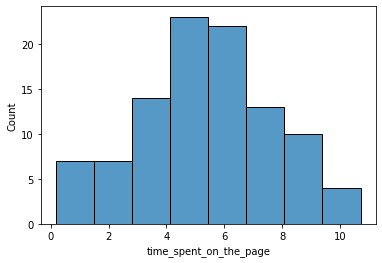

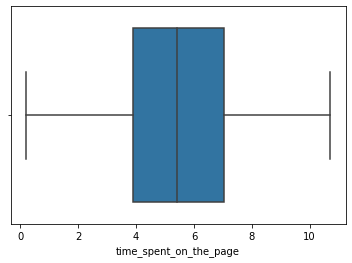

In [22]:
#Time spent on a page
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

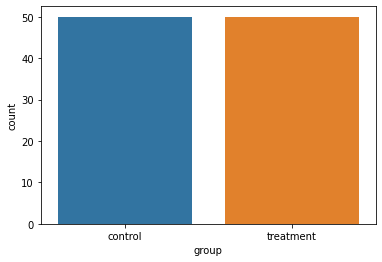

In [25]:
#Group of Users
df['group'].value_counts()
sns.countplot(data=df,x='group')
plt.show()

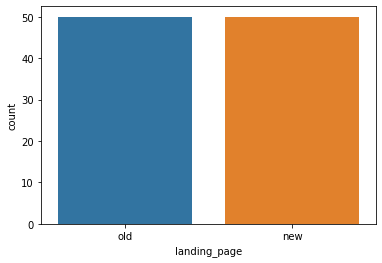

In [27]:
#Landing_page
df['landing_page'].value_counts()
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.show()

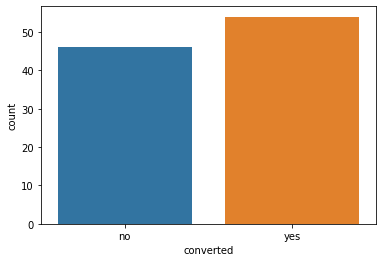

In [28]:
#Converted

df['converted'].value_counts()
# complete the code to plot the countplot
sns.countplot(data=df,x='converted')
plt.show()

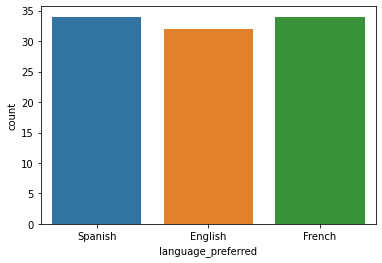

In [29]:
#Language preferred
df['language_preferred'].value_counts()
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

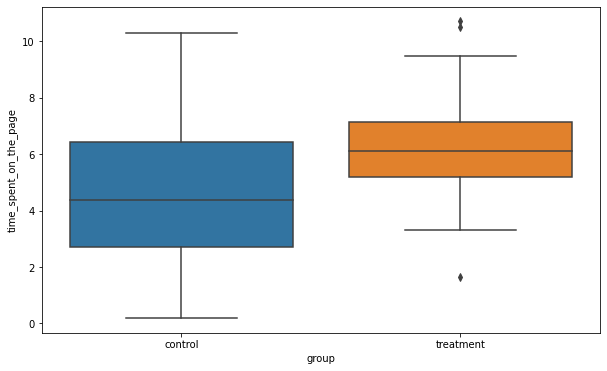

In [33]:
#Group vs Time spent
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='time_spent_on_the_page',x='group')
plt.show()

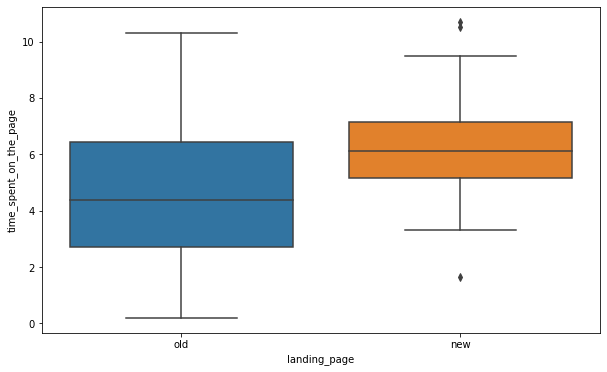

In [30]:
#Landing page Vs Time spent
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

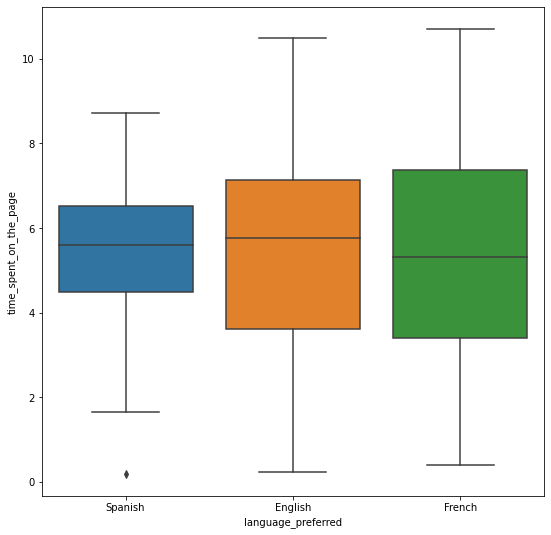

In [35]:
#Language preferred vs Time spent on the page

plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

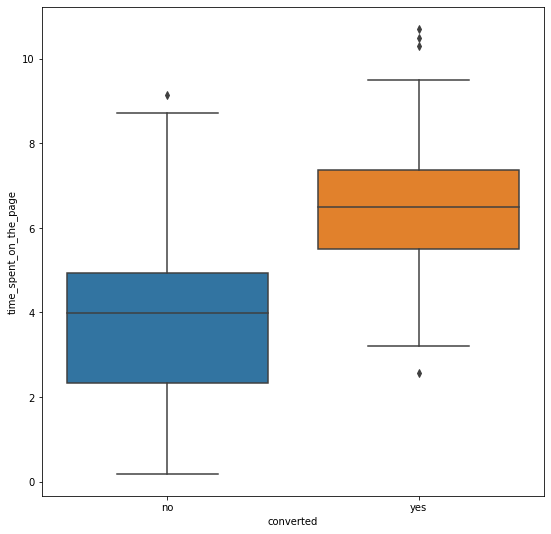

In [36]:
#Conversion status vs Time spent on the page
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

In [37]:
#Correlation between time spent and conversion

correlation_matrix = df[['time_spent_on_the_page', 'converted']].corr()
print(correlation_matrix)

                        time_spent_on_the_page
time_spent_on_the_page                     1.0


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

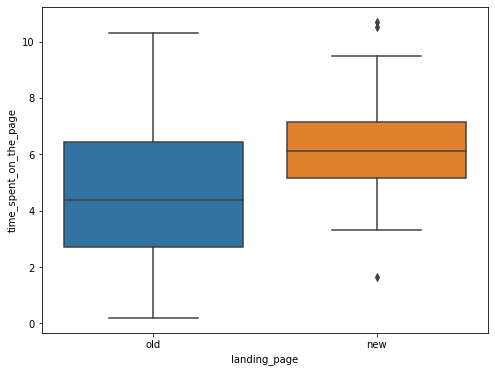

In [38]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

Time Spent: 
H0: μ = 5.4, The average time spent on a page is 5.4

Ha: μ ≠5.4, The average time spent on a page is 5.4

H0: Mean time spent on the new landing page = Mean time spent on the old landing page.

Ha:The mean time spent on the new landing page ≠ the mean time spent on the old landing page

In [ ]:
Conversion Rate: 
H0: u1=u2 conversion rate for the new landing page is equal or less than conversion rate for the old landing page

Ha: u1>u2 conversion rate for the new landing page is equal or gretaer than conversion rate for the old landing page
    H0: μ new ≤ μ old
    Ha: μ new ≤ μ old  


In [ ]:
Preferred Language impact on conversion rate
H0: The preferred language impacts the conversion rate (conversion rate is dependent on preferred language)

Ha: The preferred language has no impact on the rate of conversion

In [ ]:
Time spent vs Preferred Language
H0: u1=u2 Time spent on landing page is the same for all preferred languages

Ha: u1 ≠ u2 Time spent on landing page varies for all preferred languages

### Step 2: Select Appropriate test

In [ ]:
An independent samples t-test would be used to answer the question: 
    Do the users spend more time on the new landing page than on the existing landing page?

### Step 3: Decide the significance level

In [ ]:
As given in the problem statement, we select α=0.05


### Step 4: Collect and prepare data

In [57]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'new']['time_spent_on_the_page'] ##Complete the code
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 1.82


### Step 5: Calculate the p-value

In [58]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# p_value respectively
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var=False, alternative='greater')

print('The p-value is', p_value)


The p-value is 0.5


### Step 6: Compare the p-value with $\alpha$

In [59]:

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.5 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value indicates that there is a statistically no significant difference in time spent on the new page compared to the old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

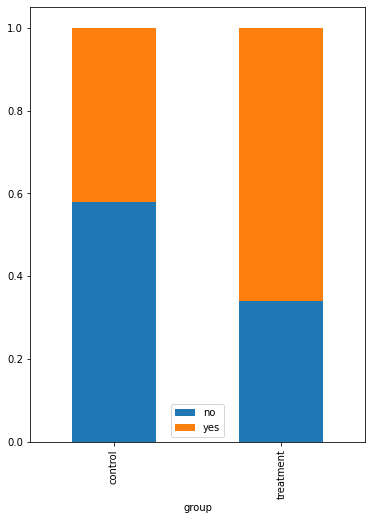

In [60]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['group'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

#Define the Null Hypotheses
H0: The new landing page does not result in a higher conversion rate compared to the old landing page.
H1: The new landing page leads to a higher conversion rate compared to the old landing page.

In [ ]:
#Select Appropriate test
To test the dependence between two categorical variables, a Z- test for independence is used.

In [ ]:
#Significance level
As given in the problem statement, we select α=0.05

In [64]:
#Collect and Prepare data
## calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [65]:
#Calculate the p-value

# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest   

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.5


In [66]:
#compare p-value with the significance level

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.5 is greater than the level of significance, we fail to reject the null hypothesis.


In [ ]:
#Inference : 
This suggests that there's no significant evidence of a difference in conversion rates between the pages.

## 3. Is the conversion and preferred language are independent or related?

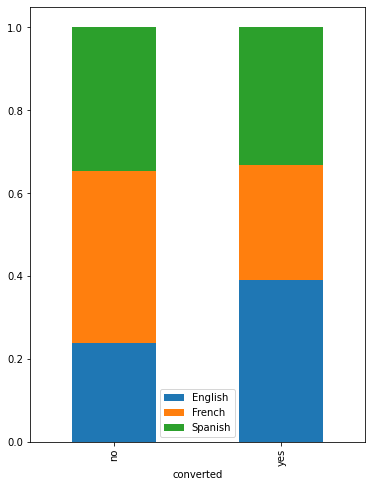

In [67]:
#visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

In [ ]:
#Define null hypothesis
H0: The conversion status is independent of the preferred language.
H1: The conversion status is dependent on the preferred language .

In [ ]:
#Appropriate Test
Chi-Square Test

In [ ]:
#Significance Level
As given in the problem statement, we select α=0.05

In [73]:
# create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [74]:
from scipy.stats import chi2_contingency

# Calculate the p-value using chi-square test
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [75]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


## 4. Is the time spent on the new page same for the different language users?

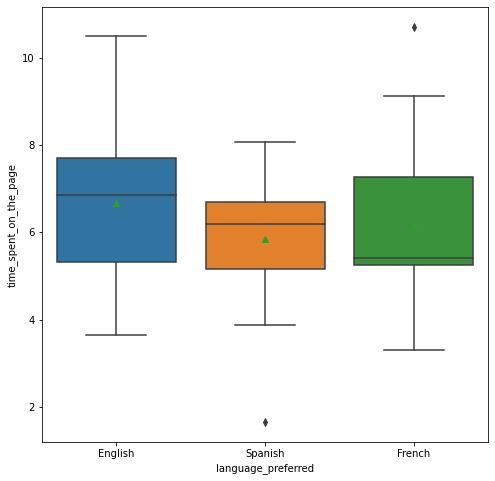

time_spent_on_the_page
1.65      1.65
3.30      3.30
3.65      3.65
3.68      3.68
3.88      3.88
3.91      3.91
4.39      4.39
4.40      4.40
4.68      4.68
4.75      4.75
4.94      4.94
5.08      5.08
5.15      5.15
5.25      5.25
5.26      5.26
5.37      5.37
5.40      5.40
5.41      5.41
5.42      5.42
5.65      5.65
5.74      5.74
5.86      5.86
6.01      6.01
6.03      6.03
6.18      6.18
6.20      6.20
6.27      6.27
6.41      6.41
6.47      6.47
6.70      6.70
6.71      6.71
6.79      6.79
7.02      7.02
7.07      7.07
7.13      7.13
7.16      7.16
7.23      7.23
7.27      7.27
7.46      7.46
7.81      7.81
8.08      8.08
8.30      8.30
8.47      8.47
8.73      8.73
9.12      9.12
9.49      9.49
10.50    10.50
10.71    10.71
Name: time_spent_on_the_page, dtype: float64

In [77]:
#Visual Analysis

# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['time_spent_on_the_page'])['time_spent_on_the_page'].mean()


In [ ]:
#Define Hypotheses
H0: The time spent on landing page is the same for all preferred language.
H1: The time spent on landing page is not the same for all preferred language.

In [ ]:
#Appropriate Test
ANOVA Analysis

In [ ]:
As given in the problem statement, we select α = 0.05.

In [85]:
#Collect and Prepare Data
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']  
print("Mean time spent by English users:", time_spent_English.mean())
print("Mean time spent by French users:", time_spent_French.mean())
print("Mean time spent by Spanish users:", time_spent_Spanish.mean())

Mean time spent by English users: 6.6637499999999985
Mean time spent by French users: 6.196470588235294
Mean time spent by Spanish users: 5.835294117647059


In [87]:
#Calculate p-value
# complete the code to import the required function
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)


The p-value is 0.43204138694325955


In [88]:
#Compare the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Conclusion and Business Recommendations

Conclusion:
1. There is no significant difference in the time spent on the new page as compared to the old
2. There is no significant difference in the conversion rate among users
3. The preferred language has no significant impact in the conversion rate
4. Among the three preferred languages, there is no significant difference in the time spent on the new page

Therefore, the new landing page has not really impacted user engagement based on these listed factors. Also, preferred language has no impact on the bahaviors of the users

Recommendations:
1. The new page needs to be re evaluated in order to understand why there was no impact observed
2. Exploring other consumer preference and further analysis of consumer behaviour may help improve on the new page 
3. Reconsidering the acceptance criteria for the page, adding more attractive features and testing the products in iterations may help in improving the usability of the product.


___